In [2]:
import numpy as np 
import pandas as pd
import os

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
plt.rcParams["figure.figsize"] = (20,10)

In [5]:
sns.set_theme()

In [6]:
train = pd.read_csv("dataset/Training.csv")
test = pd.read_csv('dataset/Testing.csv')

In [7]:
train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [8]:
test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [9]:
# droping a useless column named 'Unnamed column'
train.drop('Unnamed: 133',axis =1 , inplace = True)

In [10]:
 train.shape

(4920, 133)

In [11]:
test.shape

(42, 133)

In [12]:
train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [13]:
train['prognosis'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [14]:
train.isna().sum()
#no null values / missing data -- train set

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [15]:
test.isna().sum()
# no null values/missing data -- test set

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [16]:
symptom_count = train.apply(lambda x : True
            if x['itching'] == 1 else False, axis = 1)
  
# Count number of True in the series
num_rows = len(symptom_count[symptom_count == True].index)


In [17]:
num_rows

678

In [18]:

symtom_dict = {}
for index,column in enumerate(train.columns):
    symtom_dict[column] = index
train['prognosis'].replace(
    {}, inplace=True)


In [19]:
train['prognosis']

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [20]:
Y = train['prognosis']
X = train.drop('prognosis',axis =1)
y_test = test['prognosis']
X_test = test.drop('prognosis',axis = 1)

# Feature Correlation 

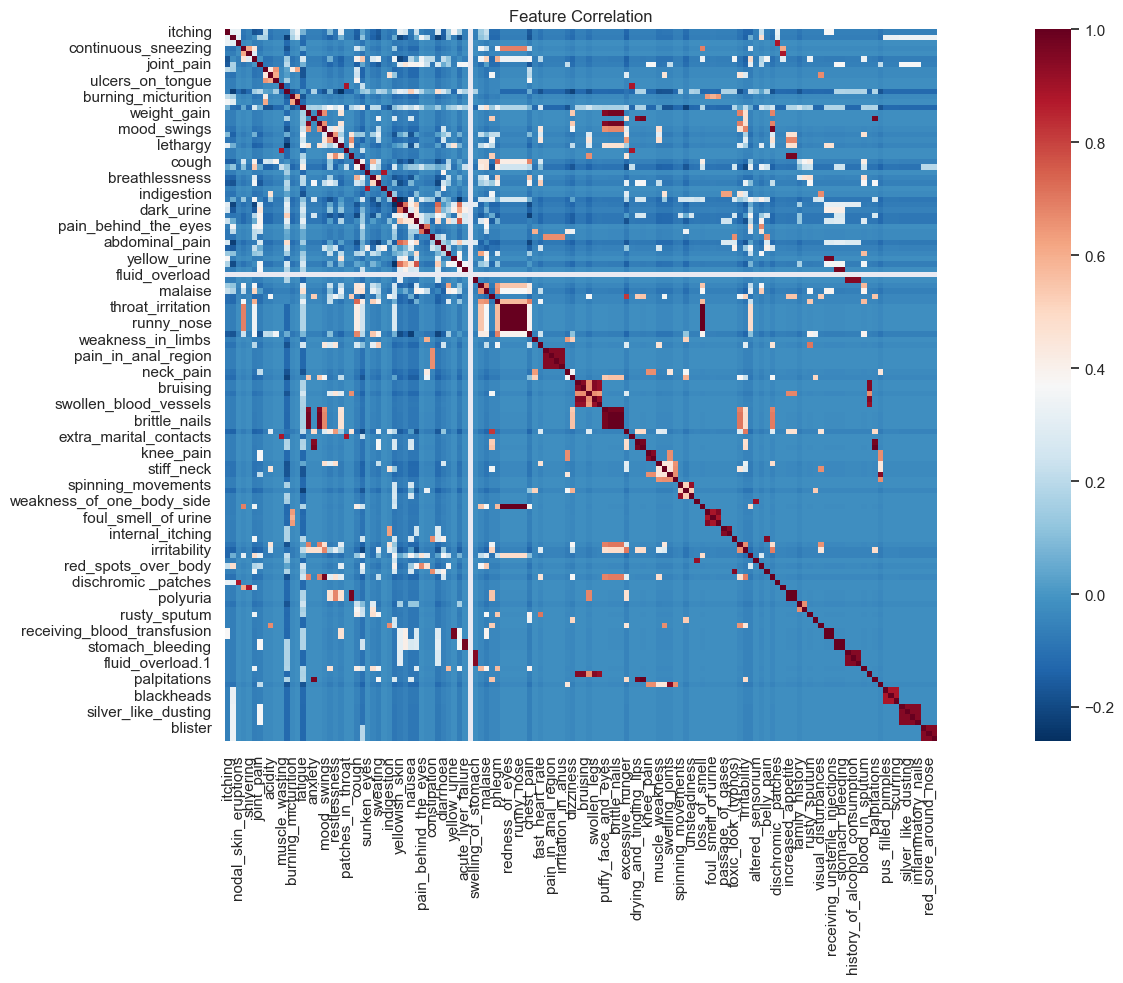

In [21]:
corr = X.corr()
sns.heatmap(corr, square=True, annot=False, cmap="RdBu_r")
plt.title("Feature Correlation")
plt.tight_layout()
plt.show()

# Train Test Split

In [22]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size = 0.33,random_state = 42)

In [23]:
print(X_train.shape ,Y_train.shape)
print(f"Training set size {X_train.shape[0]}")

(3296, 132) (3296,)
Training set size 3296


In [24]:
print(X_val.shape ,Y_val.shape)
print(f"Validation set size {X_val.shape[0]}")

(1624, 132) (1624,)
Validation set size 1624


In [25]:
print(X_test.shape ,y_test.shape)
print(f"Training set size {X_test.shape[0]}")

(42, 132) (42,)
Training set size 42


### The size of training set : 3296
### The size of validation set : 1624
### the size of testing set : 42

# Initialize the Models

In [26]:
knn = KNeighborsClassifier()
knn = knn.fit(X_train,Y_train)
print(knn)
confidence = knn.score(X_val,Y_val)
print(f"Training /Accuracy {confidence}")
Y_pred = knn.predict(X_val)
print(f"Validation Prediction {Y_pred}")
accuracy = accuracy_score(Y_val,Y_pred)
print(f"Validation accuracy {accuracy}")
conf_mat = confusion_matrix(Y_val, Y_pred)
print(f"confusion matrix {conf_mat}")
clf_report = classification_report(Y_val, Y_pred)
print(f"classification report {clf_report}")

KNeighborsClassifier()
Training /Accuracy 1.0
Validation Prediction ['Acne' 'Acne' 'Hyperthyroidism' ... 'Hepatitis D' 'Hypertension '
 'Arthritis']
Validation accuracy 1.0
confusion matrix [[37  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0  0 42 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 44]]
classification report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00    

In [27]:
gaNB = GaussianNB()
gaNB = gaNB.fit(X_train,Y_train)
print(gaNB)
confidence = gaNB.score(X_val,Y_val)
print(f"Training /Accuracy {confidence}")
Y_pred = gaNB.predict(X_val)
print(f"Validation Prediction {Y_pred}")
accuracy = accuracy_score(Y_val,Y_pred)
print(f"Validation accuracy {accuracy}")
conf_mat = confusion_matrix(Y_val, Y_pred)
print(f"confusion matrix {conf_mat}")
clf_report = classification_report(Y_val, Y_pred)
print(f"classification report {clf_report}")

GaussianNB()
Training /Accuracy 1.0
Validation Prediction ['Acne' 'Acne' 'Hyperthyroidism' ... 'Hepatitis D' 'Hypertension '
 'Arthritis']
Validation accuracy 1.0
confusion matrix [[37  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0  0 42 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 44]]
classification report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00    

In [29]:
svc = SVC()
svc = svc.fit(X_train,Y_train)
print(svc)
confidence = svc.score(X_val,Y_val)
print(f"Training /Accuracy {confidence}")
Y_pred = svc.predict(X_val)
print(f"Validation Prediction {Y_pred}")
accuracy = accuracy_score(Y_val,Y_pred)
print(f"Validation accuracy {accuracy}")
conf_mat = confusion_matrix(Y_val, Y_pred)
print(f"confusion matrix {conf_mat}")
clf_report = classification_report(Y_val, Y_pred)
print(f"classification report {clf_report}")

SVC()
Training /Accuracy 1.0
Validation Prediction ['Acne' 'Acne' 'Hyperthyroidism' ... 'Hepatitis D' 'Hypertension '
 'Arthritis']
Validation accuracy 1.0
confusion matrix [[37  0  0 ...  0  0  0]
 [ 0 42  0 ...  0  0  0]
 [ 0  0 42 ...  0  0  0]
 ...
 [ 0  0  0 ... 41  0  0]
 [ 0  0  0 ...  0 40  0]
 [ 0  0  0 ...  0  0 44]]
classification report                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       1.00      1.00      1.00        37
                                   AIDS       1.00      1.00      1.00        42
                                   Acne       1.00      1.00      1.00        42
                    Alcoholic hepatitis       1.00      1.00      1.00        40
                                Allergy       1.00      1.00      1.00        36
                              Arthritis       1.00      1.00      1.00        42
                       Bronchial Asthma       1.00      1.00      1.00        48


In [ ]:
lr = LogisticRegression(verbose=3)
lr = lr.fit(X_train,Y_train)
print(lr)
confidence = lr.score(X_val,Y_val)
print(f"Training /Accuracy {confidence}")
Y_pred = lr.predict(X_val)
print(f"Validation Prediction {Y_pred}")
accuracy = accuracy_score(Y_val,Y_pred)
print(f"Validation accuracy {accuracy}")
conf_mat = confusion_matrix(Y_val, Y_pred)
print(f"confusion matrix {conf_mat}")
clf_report = classification_report(Y_val, Y_pred)
print(f"classification report {clf_report}")

# Gradient Boosting

In [ ]:
gb = gb.fit(X_train,Y_train)
print(gb)
confidence = gb.score(X_val,Y_val)
print(f"Training /Accuracy {confidence}")
Y_pred = gb.predict(X_val)
print(f"Validation Prediction {Y_pred}")
accuracy = accuracy_score(Y_val,Y_pred)
print(f"Validation accuracy {accuracy}")
conf_mat = confusion_matrix(Y_val, Y_pred)
print(f"confusion matrix {conf_mat}")
clf_report = classification_report(Y_val, Y_pred)
print(f"classification report {clf_report}")

# Cross Validation Score

In [ ]:
score = cross_val_score(gb, X_val, Y_val, cv=3)
print(score)

In [ ]:
# gradient boosting
result = lr.predict(X_test)
accuracy = accuracy_score(y_test, result)
clf_report = classification_report(y_test, result)
print(f"accuracy {accuracy}")
print(f"clf_report {clf_report}")

In [ ]:
test.join(pd.DataFrame(lr.predict(X_test),columns=["predicted"]))[["prognosis","predicted"]]